In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

In [74]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [75]:
dataset=pd.read_csv('IMDB Dataset.csv')

In [76]:
dataset = dataset.rename(columns = {'review':'text'})
X = dataset.iloc[:-49000,:]
X

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive
996,I hated it. I hate self-aware pretentious inan...,negative
997,I usually try to be professional and construct...,negative
998,If you like me is going to see this in a film ...,negative


In [77]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = X['text'][i]
    review = re.sub(r'#[a-zA-Z0-9]+'," ", review)
    review = re.sub(r'@[a-zA-Z0-9]+', ' ', review)
    review = re.sub(r'&[a-zA-Z0-9]+', ' ', review)
    review = re.sub('[0-9]+', ' ', review)
    review = re.sub(r'RT[\s]+', ' ', review)
    review = re.sub(r"https?:\/\/\S+|www\S+|", "", review)
    review = re.sub(r'\\[a-zA-Z0-9]+', ' ', review)
    review = re.sub(r'^[a-zA-Z0-9]+'," ", review)
    review = re.sub(r'[^a-zA-Z0-9]+'," ", review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [78]:
corpus[0]

'review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker

In [79]:
X['cleaned'] = corpus
X

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/2755943507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned'] = corpus


,text,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,positive,review mention watch oz episod hook right exac...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,famili littl boy jake think zombi closet paren...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,mattei love time money visual stun film watch ...
...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,sacr ask erni fosseliu day everybodi video cam...
996,I hated it. I hate self-aware pretentious inan...,negative,hate hate self awar pretenti inan masquerad ar...
997,I usually try to be professional and construct...,negative,usual tri profession construct critic movi god...
998,If you like me is going to see this in a film ...,negative,like go see film histori class someth like sch...


In [80]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abhishek Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [81]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Abhishek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [82]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to C:\Users\Abhishek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [83]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [84]:
lemmatizer = WordNetLemmatizer()
pos=neg=obj=count=0

postagging = []

for review in corpus:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

X['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in X['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
X['senti_score'] = senti_score


X.head

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/445536334.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pos_tags'] = postagging
C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/445536334.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['senti_score'] = senti_score


<bound method NDFrame.head of                                                   text sentiment  \
0    One of the other reviewers has mentioned that ...  positive   
1    A wonderful little production. <br /><br />The...  positive   
2    I thought this was a wonderful way to spend ti...  positive   
3    Basically there's a family where a little boy ...  negative   
4    Petter Mattei's "Love in the Time of Money" is...  positive   
..                                                 ...       ...   
995  Nothing is sacred. Just ask Ernie Fosselius. T...  positive   
996  I hated it. I hate self-aware pretentious inan...  negative   
997  I usually try to be professional and construct...  negative   
998  If you like me is going to see this in a film ...  negative   
999  This is like a zoology textbook, given that it...  negative   

                                               cleaned  \
0    review mention watch oz episod hook right exac...   
1    wonder littl product br br film 

In [85]:
overall=[]
for i in range(len(X)):
    if X['senti_score'][i]>= 0:
        overall.append('Positive')
    elif X['senti_score'][i]<0:
        overall.append('Negative')
    
X['Overall Sentiment']=overall

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/2080086184.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall Sentiment']=overall


In [86]:
X.head()

,text,sentiment,cleaned,pos_tags,senti_score,Overall Sentiment
0,One of the other reviewers has mentioned that ...,positive,review mention watch oz episod hook right exac...,"[(review, NN), (mention, NN), (watch, NN), (oz...",-1.125,Negative
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,"[(wonder, NN), (littl, JJ), (product, NN), (br...",4.000,Positive
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[(thought, VBN), (wonder, VB), (way, NN), (spe...",-1.000,Negative
3,Basically there's a family where a little boy ...,negative,famili littl boy jake think zombi closet paren...,"[(famili, NN), (littl, NN), (boy, VBD), (jake,...",0.750,Positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,mattei love time money visual stun film watch ...,"[(mattei, NNS), (love, VBP), (time, NN), (mone...",3.750,Positive


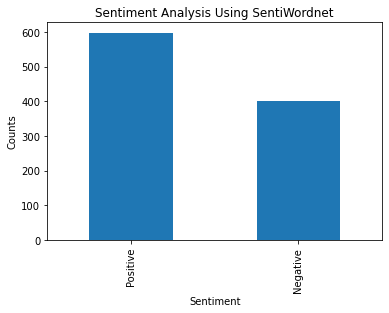

In [87]:
plt.title("Sentiment Analysis Using SentiWordnet")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
X['Overall Sentiment'].value_counts().plot(kind="bar")
plt.show()

In [88]:
def subjectivity(review):
    return TextBlob(review).sentiment.subjectivity
def polarity(review):
    return TextBlob(review).sentiment.polarity
Polarity=[]
Subjectivity=[]
for i in range(0,len( X)):
    Polarity.append(polarity(corpus[i]))
    Subjectivity.append(subjectivity(corpus[i]))

Polarity = np.array(Polarity)
Subjectivity = np.array(Subjectivity)

In [89]:
Sentiment=[]
for i in range(0,len(X)):
    if Polarity[i]>= 0:
        Sentiment.append('Positive')
    elif Polarity[i]< 0:
        Sentiment.append('Negative')
    
X["Senti"]=Sentiment

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/1008230624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Senti"]=Sentiment


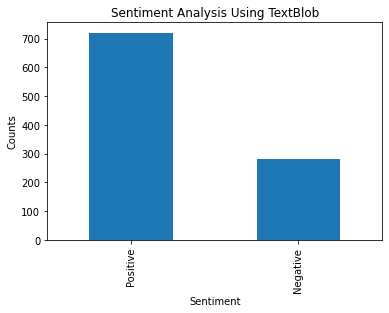

In [90]:
plt.title("Sentiment Analysis Using TextBlob")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
X['Senti'].value_counts().plot(kind="bar")
plt.show()

In [91]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Abhishek
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
cader=[]
for i in range(0,len( X)):
    cader.append(vader.polarity_scores(corpus[i]))



X["Vader_Sentiment"] = cader
cader





C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/4141940324.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Vader_Sentiment"] = cader


[{'neg': 0.211, 'neu': 0.722, 'pos': 0.068, 'compound': -0.9801},
 {'neg': 0.044, 'neu': 0.761, 'pos': 0.195, 'compound': 0.9201},
 {'neg': 0.155, 'neu': 0.635, 'pos': 0.209, 'compound': 0.7426},
 {'neg': 0.165, 'neu': 0.694, 'pos': 0.141, 'compound': -0.7184},
 {'neg': 0.013, 'neu': 0.79, 'pos': 0.197, 'compound': 0.9803},
 {'neg': 0.033, 'neu': 0.807, 'pos': 0.16, 'compound': 0.8271},
 {'neg': 0.029, 'neu': 0.782, 'pos': 0.189, 'compound': 0.9136},
 {'neg': 0.155, 'neu': 0.627, 'pos': 0.218, 'compound': 0.7675},
 {'neg': 0.183, 'neu': 0.686, 'pos': 0.131, 'compound': -0.6249},
 {'neg': 0.129, 'neu': 0.337, 'pos': 0.534, 'compound': 0.9246},
 {'neg': 0.218, 'neu': 0.604, 'pos': 0.178, 'compound': -0.2505},
 {'neg': 0.125, 'neu': 0.695, 'pos': 0.18, 'compound': 0.7096},
 {'neg': 0.121, 'neu': 0.705, 'pos': 0.174, 'compound': 0.9062},
 {'neg': 0.153, 'neu': 0.712, 'pos': 0.134, 'compound': -0.3395},
 {'neg': 0.271, 'neu': 0.531, 'pos': 0.199, 'compound': -0.5719},
 {'neg': 0.061, 'neu':

In [93]:

Vader_Senti = []

for i in range(0,len( X)):
    if cader[i]['compound']>= 0 :
        Vader_Senti.append("Positive")
    elif cader[i]['compound']<0 :
        Vader_Senti.append("Negative")
    
        
X["Vader Sentiment"] = Vader_Senti
X


C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/4313254.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Vader Sentiment"] = Vader_Senti


,text,sentiment,cleaned,pos_tags,senti_score,Overall Sentiment,Senti,Vader_Sentiment,Vader Sentiment
0,One of the other reviewers has mentioned that ...,positive,review mention watch oz episod hook right exac...,"[(review, NN), (mention, NN), (watch, NN), (oz...",-1.125,Negative,Positive,"{'neg': 0.211, 'neu': 0.722, 'pos': 0.068, 'co...",Negative
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,"[(wonder, NN), (littl, JJ), (product, NN), (br...",4.000,Positive,Positive,"{'neg': 0.044, 'neu': 0.761, 'pos': 0.195, 'co...",Positive
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[(thought, VBN), (wonder, VB), (way, NN), (spe...",-1.000,Negative,Positive,"{'neg': 0.155, 'neu': 0.635, 'pos': 0.209, 'co...",Positive
3,Basically there's a family where a little boy ...,negative,famili littl boy jake think zombi closet paren...,"[(famili, NN), (littl, NN), (boy, VBD), (jake,...",0.750,Positive,Positive,"{'neg': 0.165, 'neu': 0.694, 'pos': 0.141, 'co...",Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,mattei love time money visual stun film watch ...,"[(mattei, NNS), (love, VBP), (time, NN), (mone...",3.750,Positive,Positive,"{'neg': 0.013, 'neu': 0.79, 'pos': 0.197, 'com...",Positive
...,...,...,...,...,...,...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,sacr ask erni fosseliu day everybodi video cam...,"[(sacr, NN), (ask, NN), (erni, JJ), (fosseliu,...",0.000,Positive,Positive,"{'neg': 0.108, 'neu': 0.796, 'pos': 0.096, 'co...",Negative
996,I hated it. I hate self-aware pretentious inan...,negative,hate hate self awar pretenti inan masquerad ar...,"[(hate, NN), (hate, NN), (self, PRP), (awar, J...",0.125,Positive,Negative,"{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'comp...",Negative
997,I usually try to be professional and construct...,negative,usual tri profession construct critic movi god...,"[(usual, JJ), (tri, NN), (profession, NN), (co...",-5.375,Negative,Negative,"{'neg': 0.178, 'neu': 0.737, 'pos': 0.085, 'co...",Negative
998,If you like me is going to see this in a film ...,negative,like go see film histori class someth like sch...,"[(like, IN), (go, VBP), (see, VB), (film, NN),...",3.125,Positive,Positive,"{'neg': 0.13, 'neu': 0.7, 'pos': 0.171, 'compo...",Positive


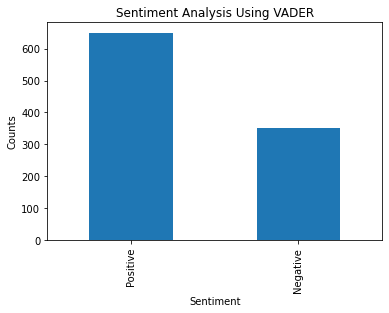

In [94]:
plt.title("Sentiment Analysis Using VADER")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
X["Vader Sentiment"].value_counts().plot(kind="bar")
plt.show()

In [95]:
X.head()

,text,sentiment,cleaned,pos_tags,senti_score,Overall Sentiment,Senti,Vader_Sentiment,Vader Sentiment
0,One of the other reviewers has mentioned that ...,positive,review mention watch oz episod hook right exac...,"[(review, NN), (mention, NN), (watch, NN), (oz...",-1.125,Negative,Positive,"{'neg': 0.211, 'neu': 0.722, 'pos': 0.068, 'co...",Negative
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...,"[(wonder, NN), (littl, JJ), (product, NN), (br...",4.000,Positive,Positive,"{'neg': 0.044, 'neu': 0.761, 'pos': 0.195, 'co...",Positive
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...,"[(thought, VBN), (wonder, VB), (way, NN), (spe...",-1.000,Negative,Positive,"{'neg': 0.155, 'neu': 0.635, 'pos': 0.209, 'co...",Positive
3,Basically there's a family where a little boy ...,negative,famili littl boy jake think zombi closet paren...,"[(famili, NN), (littl, NN), (boy, VBD), (jake,...",0.750,Positive,Positive,"{'neg': 0.165, 'neu': 0.694, 'pos': 0.141, 'co...",Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,mattei love time money visual stun film watch ...,"[(mattei, NNS), (love, VBP), (time, NN), (mone...",3.750,Positive,Positive,"{'neg': 0.013, 'neu': 0.79, 'pos': 0.197, 'com...",Positive


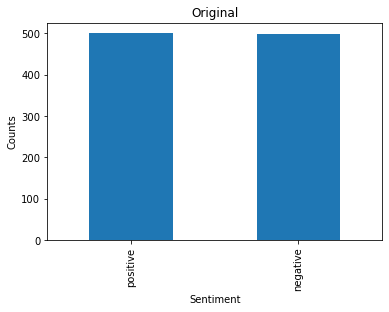

In [96]:
plt.title("Original")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
X["sentiment"].value_counts().plot(kind="bar")
plt.show()

In [97]:
for i in range(0,1000):
    if X['sentiment'][i] == 'positive':
        X['sentiment'][i]=1
    elif X['sentiment'][i] == 'negative':
        X['sentiment'][i]=0

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/3365930241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sentiment'][i]=1
C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/3365930241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sentiment'][i]=0


In [98]:
for i in range(0,1000):
    if X['Overall Sentiment'][i] == 'Positive':
        X['Overall Sentiment'][i]=1
    elif X['Overall Sentiment'][i] == 'Negative':
        X['Overall Sentiment'][i]=0
        
for i in range(0,1000):
    if X['Senti'][i] == 'Positive':
        X['Senti'][i]=1
    elif X['Senti'][i] == 'Negative':
        X['Senti'][i]=0
        
for i in range(0,1000):
    if X['Vader Sentiment'][i] == 'Positive':
        X['Vader Sentiment'][i]=1
    elif X['Vader Sentiment'][i] == 'Negative':
        X['Vader Sentiment'][i]=0

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/3182093105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall Sentiment'][i]=0
C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/3182093105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Overall Sentiment'][i]=1
C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_2016/3182093105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Senti'][i]=1
C:\Users\ABHISH~1\AppD

In [99]:
X

,text,sentiment,cleaned,pos_tags,senti_score,Overall Sentiment,Senti,Vader_Sentiment,Vader Sentiment
0,One of the other reviewers has mentioned that ...,1,review mention watch oz episod hook right exac...,"[(review, NN), (mention, NN), (watch, NN), (oz...",-1.125,0,1,"{'neg': 0.211, 'neu': 0.722, 'pos': 0.068, 'co...",0
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...,"[(wonder, NN), (littl, JJ), (product, NN), (br...",4.000,1,1,"{'neg': 0.044, 'neu': 0.761, 'pos': 0.195, 'co...",1
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...,"[(thought, VBN), (wonder, VB), (way, NN), (spe...",-1.000,0,1,"{'neg': 0.155, 'neu': 0.635, 'pos': 0.209, 'co...",1
3,Basically there's a family where a little boy ...,0,famili littl boy jake think zombi closet paren...,"[(famili, NN), (littl, NN), (boy, VBD), (jake,...",0.750,1,1,"{'neg': 0.165, 'neu': 0.694, 'pos': 0.141, 'co...",0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,mattei love time money visual stun film watch ...,"[(mattei, NNS), (love, VBP), (time, NN), (mone...",3.750,1,1,"{'neg': 0.013, 'neu': 0.79, 'pos': 0.197, 'com...",1
...,...,...,...,...,...,...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,1,sacr ask erni fosseliu day everybodi video cam...,"[(sacr, NN), (ask, NN), (erni, JJ), (fosseliu,...",0.000,1,1,"{'neg': 0.108, 'neu': 0.796, 'pos': 0.096, 'co...",0
996,I hated it. I hate self-aware pretentious inan...,0,hate hate self awar pretenti inan masquerad ar...,"[(hate, NN), (hate, NN), (self, PRP), (awar, J...",0.125,1,0,"{'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'comp...",0
997,I usually try to be professional and construct...,0,usual tri profession construct critic movi god...,"[(usual, JJ), (tri, NN), (profession, NN), (co...",-5.375,0,0,"{'neg': 0.178, 'neu': 0.737, 'pos': 0.085, 'co...",0
998,If you like me is going to see this in a film ...,0,like go see film histori class someth like sch...,"[(like, IN), (go, VBP), (see, VB), (film, NN),...",3.125,1,1,"{'neg': 0.13, 'neu': 0.7, 'pos': 0.171, 'compo...",1


In [100]:
Ori=[]
TxtB =[]
SentiWrd = []
Vad = []

Ori = X['sentiment'].astype(float)
TxtB = X['Senti'].astype(float)
SentiWrd = X['Overall Sentiment'].astype(float)
Vad = X['Vader Sentiment'].astype(float)

from sklearn.metrics import classification_report
print("              TextBlob Classifiaction Report")
print(classification_report(Ori,TxtB))
print("              SentiWordNet Classifiaction Report")
print(classification_report(Ori,SentiWrd))
print("              Vader Classifiaction Report")
print(classification_report(Ori,Vad))

              TextBlob Classifiaction Report
              precision    recall  f1-score   support

         0.0       0.78      0.44      0.56       499
         1.0       0.61      0.88      0.72       501

    accuracy                           0.66      1000
   macro avg       0.70      0.66      0.64      1000
weighted avg       0.70      0.66      0.64      1000

              SentiWordNet Classifiaction Report
              precision    recall  f1-score   support

         0.0       0.67      0.54      0.59       499
         1.0       0.61      0.73      0.67       501

    accuracy                           0.64      1000
   macro avg       0.64      0.63      0.63      1000
weighted avg       0.64      0.64      0.63      1000

              Vader Classifiaction Report
              precision    recall  f1-score   support

         0.0       0.75      0.53      0.62       499
         1.0       0.64      0.82      0.72       501

    accuracy                           0.68   

In [101]:
Ori

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
995    1.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: sentiment, Length: 1000, dtype: float64

In [102]:
Vad

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    1.0
999    0.0
Name: Vader Sentiment, Length: 1000, dtype: float64